### Decision Trees

'Carseats' data using the 'tree' package in R (like lab in the book)

We create a binary response variable 'High' (for high scales), and we include it in the same df.

In [3]:
install.packages('tree')

Installing package into 'C:/Users/Diego/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Diego\AppData\Local\Temp\RtmpmCAZu5\downloaded_packages


In [4]:
require(ISLR)
require(tree)
attach(Carseats)

Loading required package: tree

Warning message:
"package 'tree' was built under R version 3.6.3"
The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




In [14]:
#hist(Sales)

In [10]:
mean(Sales)

[1] 7.496325

Trees w/ binary variable

create BINARY variable ('HIgh')

In [9]:
#if Sales less than 8, not high, else it is high
High<-ifelse(Sales<=8,'No','Yes')
#High

Put 'High' into data frame Carseats

In [11]:
Carseats=data.frame(Carseats, High)

In [26]:
#head(Carseats)

In [28]:
#names(Carseats)

Now we will FIT a TREE to these data, SUMMARIZE, and PLOT it

Notice we _exclude_ 'Sales' ftom right-hand side of the formula, b/c the response is derived from it

In [18]:
#our response is High not Sales
#model== everything except Sales (-)
tree.carseats<-tree(High~.-Sales,data=Carseats)

We can see the variables that we involved, number of terminal nodes (27), residual mean deviance (.4575), which in this case is it's a binary response, so it's a binomial deviance.

In [19]:
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

In [24]:
#plot(tree.carseats)

Annotate w/ command 'text'

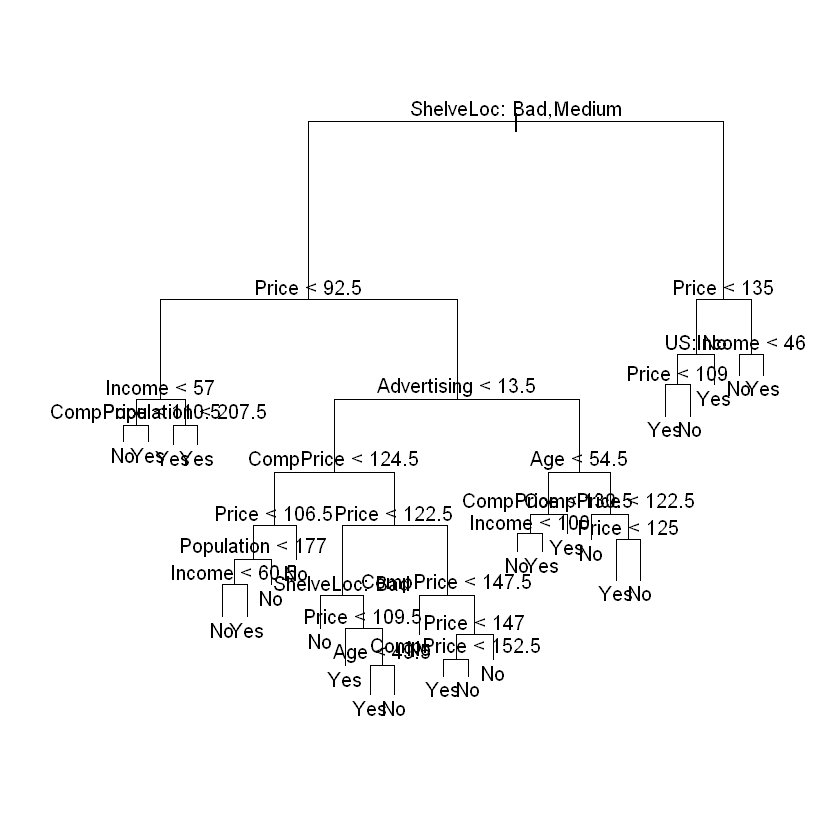

In [21]:
#many splits
plot(tree.carseats)
text(tree.carseats,pretty=0)

For detailed summary of the tree, print it

details of every node, observations of the root, mean deviance of the root, every splitting variable, and proportion of yes/no

every node is numbered (corresponds to tree going down)
 

In [23]:
#tree.carseats

Let's create a TRAINING/TESTING set (250,150) split of the 400 observations

grow the tree on TRAINING set

evaluate performance on the TEST set

seed -- make results reproducable (use diff seeds each time)


sample--take random sample from the index numbers of samples. 

1 to nrow (ie, 400) . 

We eant a sample size of 250. 

Default is w/ out replacement.


In [29]:
set.seed(1011)
#indexes 250 of 400 observations
train<-sample(1:nrow(Carseats),250)
#refit tree, but use subset (training set)
tree.carseats<-tree(High~.-Sales,Carseats,subset=train)

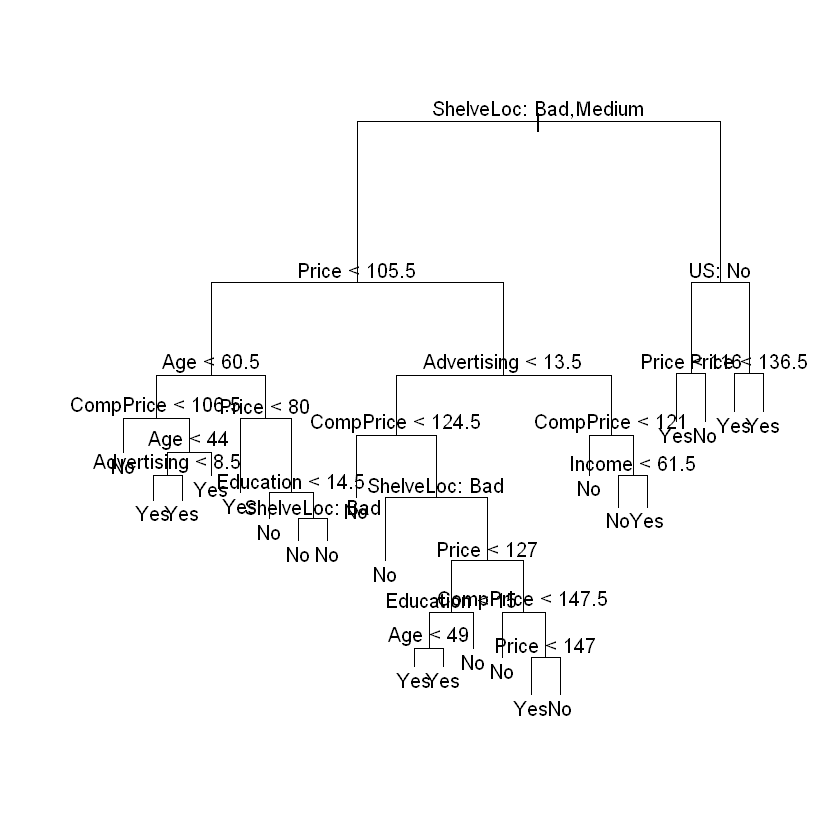

In [30]:
#different, b/c diff data set
plot(tree.carseats); text(tree.carseats,pretty=0)

Predict on TEST set

1)use predict function (predict())

2)give it Fitted tree (tree.carseats)

3)give it data to which we want to Predict ([-train,]

4) type = 'class' -- can make different types of predictions, here we want to predict class labels, not Probabilities

In [31]:
tree.pred<-predict(tree.carseats, Carseats[-train,],type='class')


with -- ' with tests data (Carseats[-train]), make a table, w/ TRUE vs PREDICT (compares predicted vs actual values in the 'High' variable) 

In [33]:
with(Carseats[-train,],table(tree.pred,High))

         High
tree.pred No Yes
      No  58  20
      Yes 27  45

Accuracy

In [34]:
#error rate of .69
(58+45)/150

[1] 0.6866667

#### Cross-Validation

This tree was grown to full depth, and might be too variable.

We use CV to prune it.

1) use cv.tree

2) tell it we want misclassification as basis for pruning the tree

Note: this will do 10-fold CV

In [36]:
cv.carseats<-cv.tree(tree.carseats, FUN=prune.misclass)

1) tells you size of the trees as pruned back

2) deviiance as pruned back

Notice deviance goes down and then up as pruning continues

3) tells you cost-complexity paramter for the process 

In [40]:
cv.carseats

$size
 [1] 23 17 16 14 10  8  6  5  4  2  1

$dev
 [1]  64  61  69  67  70  81  80  83  81  81 101

$k
 [1] -Inf  0.0  1.0  1.5  2.0  3.0  3.5  5.0  6.0  7.0 27.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

plot looks jumpy b/c misclassifcation on 250 cv points

bottom around 17/18 before it increases again


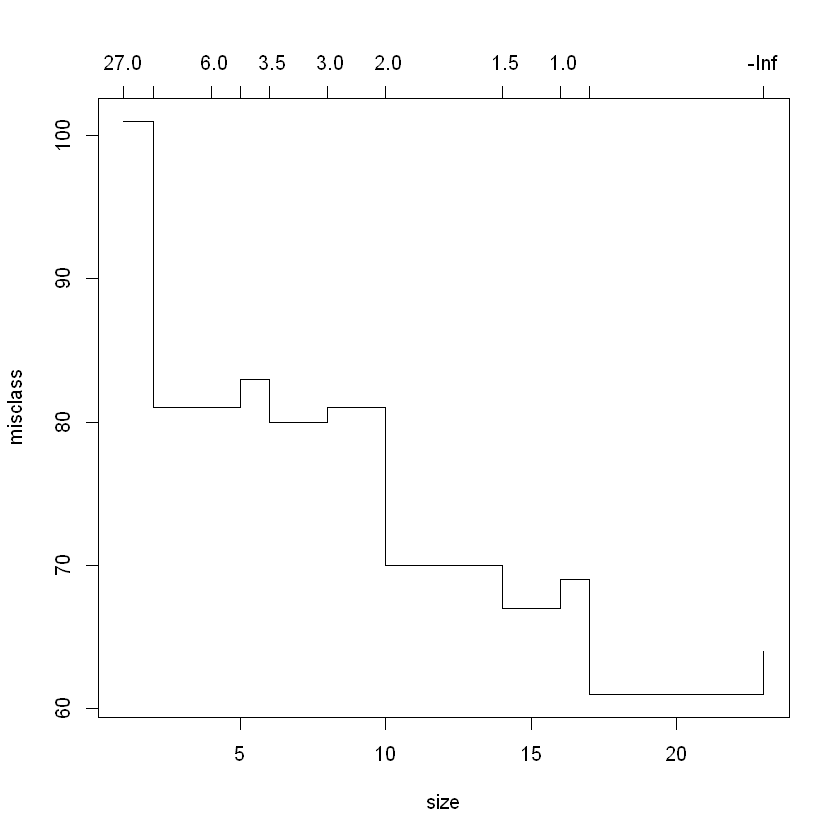

In [39]:
#min appears to be 17
plot(cv.carseats)

prune our three to size of 17 to identify that tree

fit tree on entired data

In [41]:
#min appears to be 17
prune.carseats<-prune.misclass(tree.carseats,best=17)

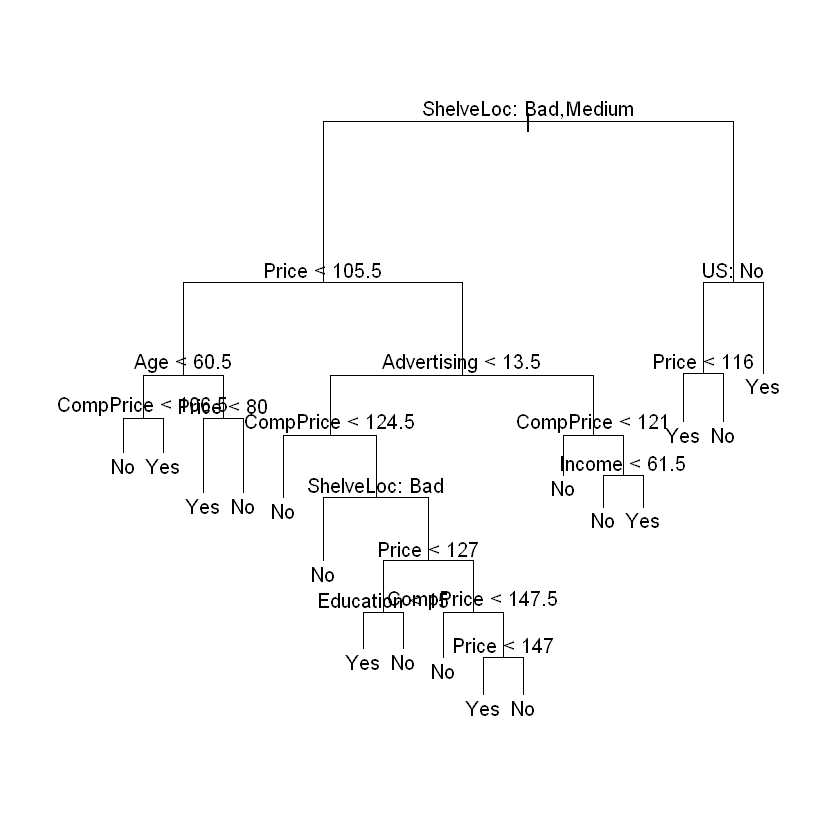

In [42]:
#shollower tree
#can read labels now
plot(prune.carseats);text(prune.carseats,pretty=0)

Predict the pruned tree of size 17

In [43]:
tree.pred<-predict(prune.carseats, Carseats[-train,],type='class')
with(Carseats[-train,],table(tree.pred,High))

         High
tree.pred No Yes
      No  61  19
      Yes 24  46

not much improvement, but it is a shollwer tree, which is easier to interpret

In [44]:
(61+46)/150

[1] 0.7133333

#### Conclusion

Trees are easy to interpret, but they do poorly on prediction.